In [4]:
import pickle
import os

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
data_folder = "imgs"
files = os.listdir(data_folder)
files.sort()
files[:3]

['I1_000001.png', 'I1_000002.png', 'I1_000003.png']

In [11]:
left = 'I1_000011.png'
right = 'I2_000011.png'

In [12]:
img1 = cv2.imread(os.path.join(data_folder, left), cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(os.path.join(data_folder, right), cv2.IMREAD_GRAYSCALE)

In [13]:
ps1 = [(865, 293), (681, 225), (394, 300), (1060, 325)]
ps2 = [(806, 292), (646, 225), (330, 300), (991, 324)]

In [14]:
img1.shape

(372, 1344)

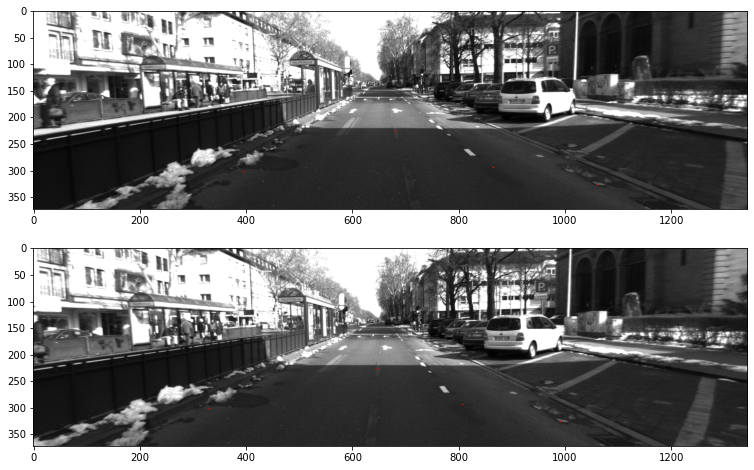

In [15]:
_,axs = plt.subplots(2,1,figsize=(15, 8))
axs[0].imshow(img1, cmap="gray")
x,y = zip(*ps1)
axs[0].plot(x, y, "r.", markersize=1)

axs[1].imshow(img2, cmap="gray")
x,y = zip(*ps2)
axs[1].plot(x, y, "r.", markersize=1)
plt.show()

In [16]:
pts1 = np.array([np.array(v).astype('float32') for v in ps1])
pts2 = np.array([np.array(v).astype('float32') for v in ps2])

matrix = cv2.getPerspectiveTransform(pts1, pts2)
matrix.round(5)

array([[ 9.480500e-01, -5.050400e-01,  8.280861e+01],
       [ 5.060000e-03,  8.591500e-01,  1.737615e+01],
       [ 2.000000e-05, -2.800000e-04,  1.000000e+00]])

In [17]:
H, W = img2.shape
img11 = cv2.warpPerspective(img1, matrix, (W, H))

In [18]:
im1 = cv2.pyrDown(img11)
im2 = cv2.pyrDown(img2)

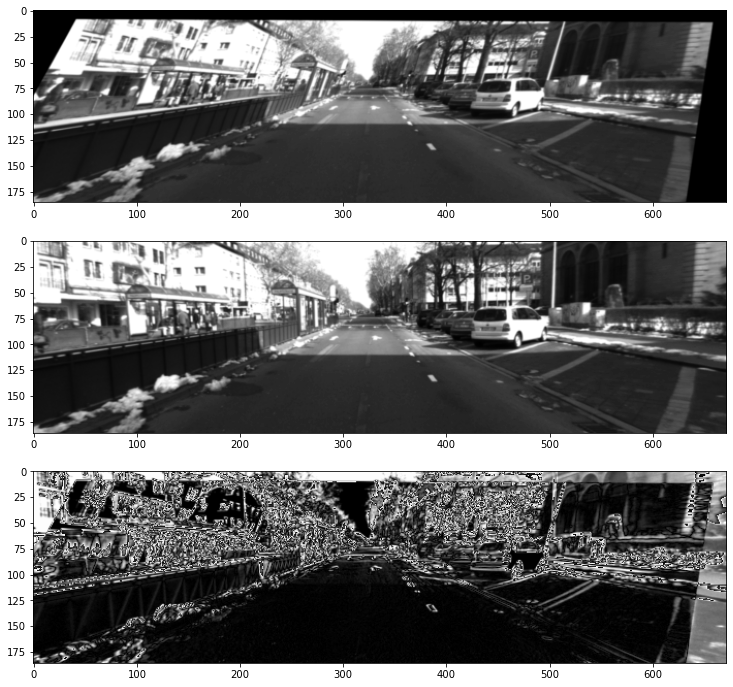

In [19]:
_,axs = plt.subplots(3,1,figsize=(15, 12))
axs[0].imshow(im1, cmap="gray")

axs[1].imshow(im2, cmap="gray")

diff = np.abs(im1.astype('float') - im2.astype('float')) * 3
axs[2].imshow(diff.astype('uint8'), cmap="gray")
plt.show()

In [20]:
im2[100:175, 300:400]

array([[142, 144, 145, ...,  53,  50,  47],
       [143, 145, 145, ...,  55,  51,  46],
       [144, 144, 147, ...,  56,  55,  52],
       ...,
       [ 43,  42,  42, ...,  42,  43,  43],
       [ 43,  43,  42, ...,  42,  42,  41],
       [ 42,  43,  44, ...,  43,  41,  41]], dtype=uint8)

In [42]:
im1[100:175, 300:400]

array([[49, 49, 49, ..., 55, 58, 61],
       [48, 49, 50, ..., 70, 82, 98],
       [49, 50, 49, ..., 73, 88, 99],
       ...,
       [39, 39, 39, ..., 35, 35, 34],
       [39, 40, 39, ..., 35, 35, 35],
       [39, 39, 39, ..., 34, 35, 35]], dtype=uint8)

In [14]:
diff = np.abs(im1.astype('float') - im2.astype('float'))